## Notebook 01 – Data Exploration

This notebook provides a first look at the [HAM10000](https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000) dataset.

We’ll explore:
- Dataset structure and image counts
- Class distributions
- Basic quality checks and metadata inspection

> **Note**: This notebook assumes that the dataset has been downloaded and placed in the following directory:
>
> ```
> data/raw/HAM10000/
> ├── HAM10000_metadata.csv
> ├── images/ISIC_0024306.jpg
> └── images/ISIC_0024307.jpg
> ```



In [36]:
# Standard libraries
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Project paths
PROJECT_DIR = Path.cwd().parents[0]
DATA_RAW = PROJECT_DIR / "data" / "raw" / "HAM10000"
IMAGE_DIR = DATA_RAW / "images"

# Data set location check
assert (DATA_RAW / "HAM10000_metadata.csv").exists() \
   and (IMAGE_DIR / "ISIC_0024306.jpg").exists(), "Metadata or image files not found. Please check dataset location."


In [14]:
metadata = pd.read_csv(DATA_RAW / "HAM10000_metadata.csv")
print(f"Metadata shape: {metadata.shape}")
metadata.head()


Metadata shape: (10015, 8)


,lesion_id,image_id,dx,dx_type,age,sex,localization,filename
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,ISIC_0031633.jpg


## Class Distribution

Let’s examine how many samples exist for each diagnosis category.


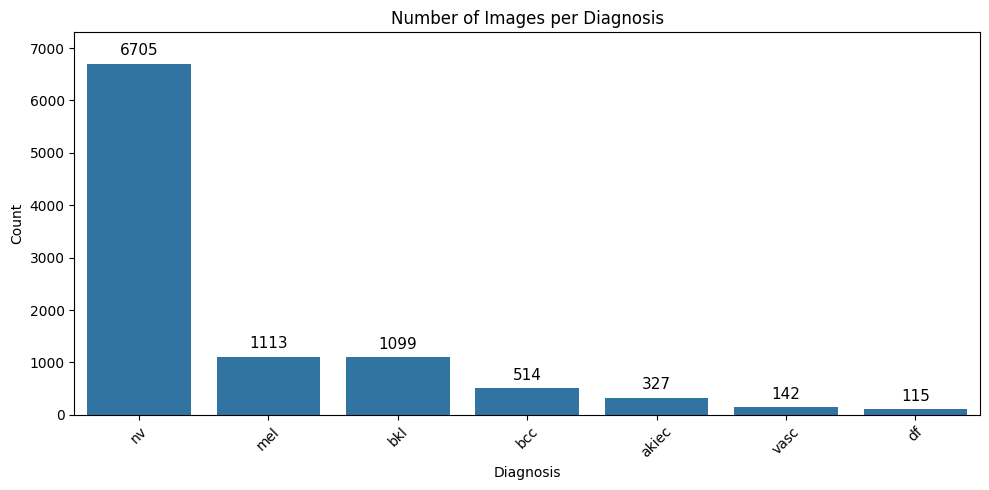

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=metadata, x="dx", order=metadata["dx"].value_counts().index)
plt.title("Number of Images per Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.ylim(0, 7300)
counts = metadata["dx"].value_counts()
for i, value in enumerate(counts):
    plt.text(i, value + 100, f"{value:d}", ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.show()

/tmp/ipykernel_509556/164211932.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=counts.index, x=counts.values, ax=ax_bar, palette=colors, errorbar=None)
/tmp/ipykernel_509556/164211932.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


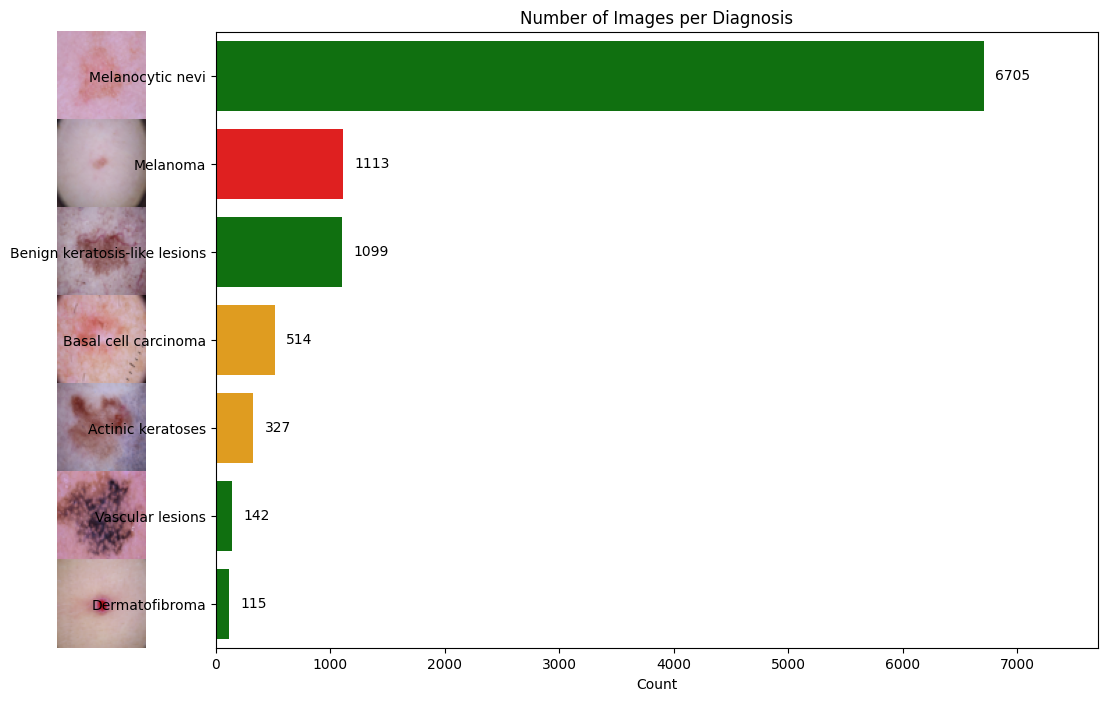

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.gridspec as gridspec

# Load data and map labels
metadata = pd.read_csv(DATA_RAW / "HAM10000_metadata.csv")
dx_mapping = {
    'nv': 'Melanocytic nevi', 'mel': 'Melanoma', 
    'bkl': 'Benign keratosis-like lesions', 'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses', 'vasc': 'Vascular lesions', 
    'df': 'Dermatofibroma'
}
metadata["dx_full"] = metadata["dx"].map(dx_mapping)

# Get class counts and representative images
counts = metadata["dx_full"].value_counts()
representatives = metadata.groupby("dx_full").first().reset_index()

# Define colors for each category
# Melanoma: red, other malignant (basal cell carcinoma, actinic keratoses): orange, benign: green
colors = []
for category in counts.index:
    if category == 'Melanoma':
        colors.append('red')
    elif category in ['Basal cell carcinoma', 'Actinic keratoses']:
        colors.append('orange')
    else:
        colors.append('green')

# Create figure with two columns
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5], wspace=0.05)
ax_img = fig.add_subplot(gs[0])
ax_img.axis("off")
ax_bar = fig.add_subplot(gs[1], sharey=ax_img)

# Create bar plot with custom colors
sns.barplot(y=counts.index, x=counts.values, ax=ax_bar, palette=colors, errorbar=None)
ax_bar.set(title="Number of Images per Diagnosis", xlabel="Count", ylabel="")
ax_bar.set_xlim(0, counts.max() + 1000)

# Add count labels
for i, value in enumerate(counts):
    ax_bar.text(value + 100, i, str(value), va='center')

# Add representative images
for i, (_, row) in enumerate(representatives.iterrows()):
    try:
        img = Image.open(IMAGE_DIR / f"{row['image_id']}.jpg").convert("RGB").resize((64, 64))
        imagebox = OffsetImage(img, zoom=1)
        ab = AnnotationBbox(imagebox, (0.5, i), frameon=False, box_alignment=(0.5, 0.5))
        ax_img.add_artist(ab)
    except FileNotFoundError:
        print(f"Image not found: {row['image_id']}.jpg")

plt.tight_layout()
plt.show()